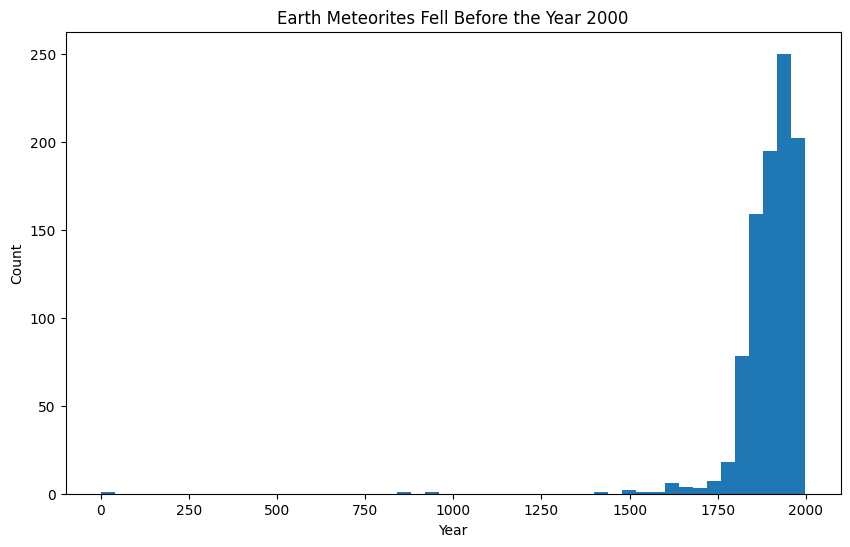

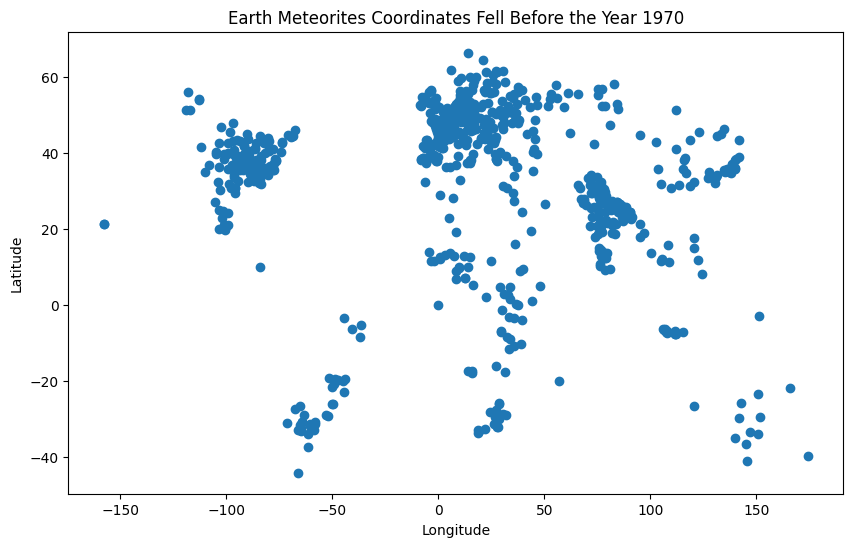

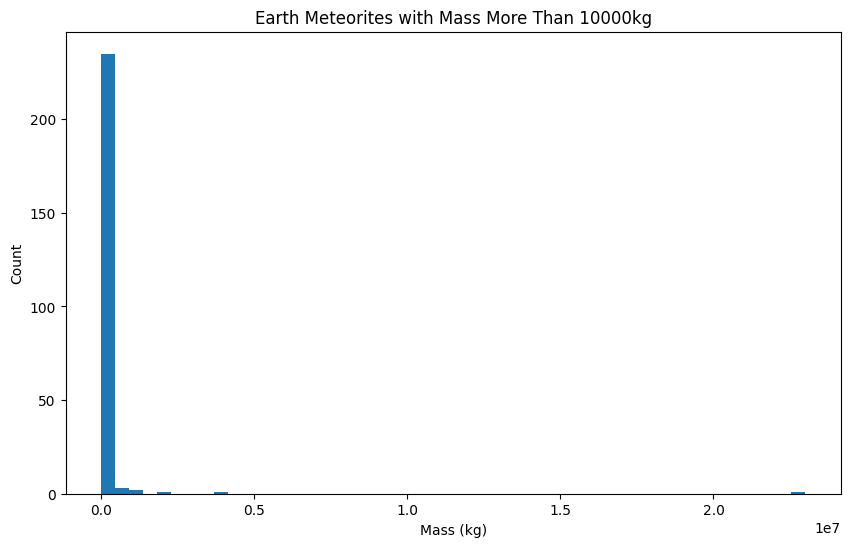

In [13]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Download the Earth meteorite data from the link
url = 'https://data.nasa.gov/resource/y77d-th95.json'
response = requests.get(url)
data = response.json()

# Create a pandas DataFrame from the Earth meteorite data
df = pd.DataFrame(data)

# Convert the 'mass' column to numeric (assuming it is in kg)
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
meteorites_before_2000 = df[df['year'].apply(lambda x: int(x[:4]) if not pd.isnull(x) else 0) < year_threshold_1]


# Get all the Earth meteorites coordinates that fell before the year 1970
meteorites_coordinates_before_1970 = df[df['year'].apply(lambda x: int(x[:4]) if not pd.isnull(x) else 0) < year_threshold_2][['reclat', 'reclong']]
meteorites_coordinates_before_1970['reclat'] = pd.to_numeric(meteorites_coordinates_before_1970['reclat'], errors='coerce')
meteorites_coordinates_before_1970['reclong'] = pd.to_numeric(meteorites_coordinates_before_1970['reclong'], errors='coerce')



# Get all the Earth meteorites whose mass was more than 10000kg
mass_threshold = 10000
meteorites_with_mass_more_than_10000kg = df[df['mass'] > mass_threshold]

# Plotting the analysis

# Plotting Earth meteorites fell before the year 2000
plt.figure(figsize=(10, 6))
plt.hist(meteorites_before_2000['year'].apply(lambda x: int(x[:4]) if isinstance(x, str) else 0), bins=50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites Fell Before the Year 2000')
plt.show()


# Plotting Earth meteorites coordinates fell before the year 1970
plt.figure(figsize=(10, 6))
plt.scatter(meteorites_coordinates_before_1970['reclong'], meteorites_coordinates_before_1970['reclat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Coordinates Fell Before the Year 1970')
plt.show()

# Plotting Earth meteorites with mass more than 10000kg
plt.figure(figsize=(10, 6))
plt.hist(meteorites_with_mass_more_than_10000kg['mass'], bins=50)
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.title('Earth Meteorites with Mass More Than 10000kg')
plt.show()
